<a id='hyperlink'></a>
## <center>Title Table</center>
-[LOADING LIBRARIES, REVIEWING EXISTING DATASETS, AND DATA CLEANING.](#hyperlink14)

-[CREATING YOUTUBE RISK REPORT](#hyperlink0)

-[TOP 3 COUNTRIES WITH HIGHEST RISK STATUS](#hyperlink1)

-[TOP 3 COUNTRIES WITH LOWEST RISK STATUS](#hyperlink2)

-[TOP 3 BRANDS WITH HIGHEST RISK STATUS](#hyperlink3)

-[TOP 3 BRANDS WITH LOWEST RISK STATUS](#hyperlink4)

-[TOP 3 COUNTRIES WITH HIGHEST NUMBER OF VIDEOS WITHOUT DESCRIPTION](#hyperlink5)

-[TOP 3 BRANDS WITH THE HIGHEST NUMBER OF VIDEOS WITHOUT DESCRIPTION](#hyperlink6)

-[TOP 3 BRANDS WITH THE HIGHEST NUMBER OF VIDEOS COMMENTS ENABLED](#hyperlink7)

-[TOP 3 COUNTRIES WITH THE HIGHEST NUMBER OF VIDEOS COMMENTS ENABLED](#hyperlink8)

-[TOP 3 BRANDS WITH THE VIDEOS HAVE LESS THAN 100 VIEWS](#hyperlink9)

-[TOP 3 COUNTRIES WITH THE VIDEOS HAVE LESS THAN 100 VIEWS](#hyperlink10)

-[TOP 3 CHANNELS HAVE VIDEOS WITHOUT LOCATIONS](#hyperlink11)

<a id='hyperlink14'></a>
**LOADING LIBRARIES, REVIEWING EXISTING DATASETS, AND DATA CLEANING.**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from collections import Counter
%matplotlib inline

import operator
import time
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
import datetime
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_excel (r'C:\Users\Selen Ugur Kose\Downloads\Youtube Data.xlsx', sheet_name='Youtube Data',header=2)
df.head(5)

,Brand,Market,Title,Video URL,Views,Monitoring ID,Has Description?,Location?,Comments?,Scan Date
0,AVEENO,Canada,Aveeno Canada,youtube.com/watch?v=EaY-IoTqfWQ,22374,IDM 02688,Has Description,Location Specified,Comments Enabled,2021-02-16
1,AVEENO,Canada,Aveeno Canada,youtube.com/watch?v=EaY-IoTqfWQ,22374,IDM 02688,Has Description,Location Specified,Comments Enabled,2021-03-05
2,CAREFREE,Colombia,¡Nos pasa a todas!,youtube.com/watch?v=MUF62kJ8_p0,119973,IDM 02688,Has Description,Location Specified,Comments Enabled,2021-02-16
3,CAREFREE,Colombia,¡Nos pasa a todas!,youtube.com/watch?v=MUF62kJ8_p0,119973,IDM 02688,Has Description,Location Specified,Comments Enabled,2021-03-05
4,CLEAN&CLEAR,Canada,Clean & Clear Canada,youtube.com/watch?v=5qL9DU9SrtM,36901,IDM 02688,Has Description,No Location,Comments Enabled,2021-02-16


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Brand             4076 non-null   object        
 1   Market            4076 non-null   object        
 2   Title             4076 non-null   object        
 3   Video URL         4076 non-null   object        
 4   Views             4076 non-null   int64         
 5   Monitoring ID     1607 non-null   object        
 6   Has Description?  4076 non-null   object        
 7   Location?         4076 non-null   object        
 8   Comments?         4076 non-null   object        
 9   Scan Date         4076 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 318.6+ KB


Data has only string and integer values.
Only "Monitoring ID" column has null/missing values
I don't think that "Monitoring ID" column gives meaningful analyse so I want to analyse that column

In [43]:
print(pd.unique(df['Monitoring ID']))

['IDM 02688' nan 'No IDM']


In [45]:
df['Monitoring ID'].value_counts()

No IDM       1591
IDM 02688      16
Name: Monitoring ID, dtype: int64

That column has only 16 row ID data within the whole 4076 rows.So I decided to remove that column.

In [46]:
df.drop(columns='Monitoring ID',inplace=True)

In [53]:
df.columns

Index(['Brand', 'Market', 'Title', 'Video URL', 'Views', 'Has Description?',
       'Location?', 'Comments?', 'Scan Date'],
      dtype='object')

"Monitoring ID" column has been removed successfuly

In [54]:
df.isnull().sum()

Brand               0
Market              0
Title               0
Video URL           0
Views               0
Has Description?    0
Location?           0
Comments?           0
Scan Date           0
dtype: int64

It says "Information that needs tracking and will change month on month" in excel. I wonder that How often is the data updated and does data has been changed in a month?

In [55]:
df['Scan Date'].value_counts()

2021-03-05    2059
2021-02-16    2017
Name: Scan Date, dtype: int64

It has only 2 different date and their counts are nearly the same.
Let's see if the data has changed in these 2 different date ranges.

In [57]:
df.drop_duplicates(subset=['Brand', 'Market', 'Title', 'Video URL', 'Views', 'Has Description?',
       'Location?', 'Comments?'])

,Brand,Market,Title,Video URL,Views,Has Description?,Location?,Comments?,Scan Date
0,AVEENO,Canada,Aveeno Canada,youtube.com/watch?v=EaY-IoTqfWQ,22374,Has Description,Location Specified,Comments Enabled,2021-02-16
2,CAREFREE,Colombia,¡Nos pasa a todas!,youtube.com/watch?v=MUF62kJ8_p0,119973,Has Description,Location Specified,Comments Enabled,2021-02-16
4,CLEAN&CLEAR,Canada,Clean & Clear Canada,youtube.com/watch?v=5qL9DU9SrtM,36901,Has Description,No Location,Comments Enabled,2021-02-16
6,CLEAN&CLEAR,Saudi Arabia,CLEAN & CLEAR® Arabia,youtube.com/watch?v=ecD9USiGrl8,4272,Has Description,No Location,Comments Enabled,2021-02-16
8,CLEAN&CLEAR,Saudi Arabia,CLEAN & CLEAR® Arabia,youtube.com/watch?v=jXNFAjdSsWs,9150,Has Description,No Location,Comments Enabled,2021-02-16
...,...,...,...,...,...,...,...,...,...
4066,TYLENOL,Canada,TYLENOL® Canada Brand Channel,youtube.com/watch?v=DD2VWBx07YY,80662,Has Description,Location Specified,Comments Enabled,2021-02-16
4068,TYLENOL,Canada,TYLENOL® Canada Brand Channel,youtube.com/watch?v=OO7-wUmhwVs,882178,Has Description,Location Specified,Comments Enabled,2021-02-16
4070,TYLENOL,Mexico,Tylenol México,youtube.com/watch?v=tKIsynzmlCY,1276724,Has Description,Location Specified,Comments Enabled,2021-02-16
4072,TYLENOL,Thailand,Tylenol Thailand Thailand,youtube.com/watch?v=F9pN9FfywLs,2337,Description Missing,No Location,Comments Enabled,2021-02-16


In [59]:
len(df)

4076

In [60]:
main_df=df.drop_duplicates(subset=['Brand', 'Market', 'Title', 'Video URL', 'Views', 'Has Description?',
       'Location?', 'Comments?'])
len(main_df)

2059

As can be seen above, when we remove duplicate rows from all columns except the "Scan Date" column in the original dataset, we can say that the total number of rows decreases by about half, so we can say that the data has almost not changed in a month.

<a id='hyperlink0'></a>
**CREATING YOUTUBE RISK REPORT**

I decided to create a Youtube Risk Report according to 'Views', 'Has Description?',
'Location?', 'Comments?' columns.Each video url has risk score In my model.     When the risk score is 1 out of 4,the video has low risk status.If it is 2, risk status is medium.If it is more than 2 then risk status is high. That means Youtube authorities tend to remove the video.

In [62]:
main_df["Description Risk Score"] = np.where(main_df["Has Description?"]=="Has Description", 0,1)
main_df["View Risk Score"] = np.where(main_df["Views"]<100, 1,0)
main_df["Location Risk Score"] = np.where(main_df["Location?"]=="No Location", 1,0)
main_df["Comment Risk Score"] = np.where(main_df["Comments?"]=="Comments Enabled", 0,1)
main_df["Sum Risk Score"]=main_df["Description Risk Score"]+main_df["View Risk Score"]+main_df["Location Risk Score"]+main_df["Comment Risk Score"]
main_df["Risk Status"] = np.where(main_df["Sum Risk Score"]<=1, "Low",\
                                            (np.where(main_df["Sum Risk Score"]==2, "Medium","High")))
                                             
main_df.head(2)




,Brand,Market,Title,Video URL,Views,Has Description?,Location?,Comments?,Scan Date,Description Risk Score,View Risk Score,Location Risk Score,Comment Risk Score,Sum Risk Score,Risk Status
0,AVEENO,Canada,Aveeno Canada,youtube.com/watch?v=EaY-IoTqfWQ,22374,Has Description,Location Specified,Comments Enabled,2021-02-16,0,0,0,0,0,Low
2,CAREFREE,Colombia,¡Nos pasa a todas!,youtube.com/watch?v=MUF62kJ8_p0,119973,Has Description,Location Specified,Comments Enabled,2021-02-16,0,0,0,0,0,Low


<a id='hyperlink1'></a>
**TOP 3 COUNTRIES WITH HIGHEST RISK STATUS**


In [113]:
analyse1=main_df[(main_df['Risk Status']=="High")]
analyse1=analyse1.groupby('Market')['Risk Status'].value_counts().reset_index(name='Counts').sort_values(ascending=False,by='Counts')
analyse1.head()



,Market,Risk Status,Counts
0,Australia,High,70
5,Denmark,High,11
10,Japan,High,11
12,Nordics,High,9
7,Hong Kong,High,9


In [114]:
analyse1 = analyse1[['Market','Counts']].reset_index(drop=True).head()
analyse1

,Market,Counts
0,Australia,70
1,Denmark,11
2,Japan,11
3,Nordics,9
4,Hong Kong,9


In [115]:
analyse1=analyse1.groupby('Market')['Counts'].sum().sort_values(ascending=False)
analyse1.head()

Market
Australia    70
Denmark      11
Japan        11
Hong Kong     9
Nordics       9
Name: Counts, dtype: int64

Text(0.5, 1.0, 'Top 3 countries with highest risk status')

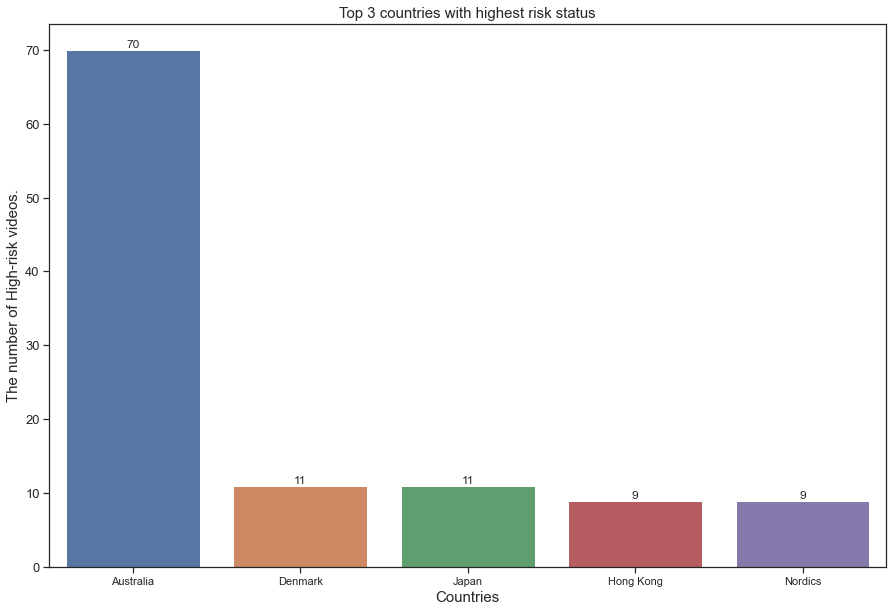

In [123]:
plt.figure(figsize=(15,10))
chart=sns.barplot(x=analyse1.index, y=analyse1.values)
chart.bar_label(chart.containers[0])
plt.xticks(rotation= 0)
plt.yticks(fontsize=13)
plt.xlabel('Countries',fontsize=15)
plt.ylabel('The number of High-risk videos.',fontsize=15)
plt.title('Top 3 countries with highest risk status',fontsize=15)

<a id='hyperlink2'></a>
**TOP 3 COUNTRIES WITH LOWEST RISK STATUS**


Text(0.5, 1.0, 'Top 3 countries with lowest risk status')

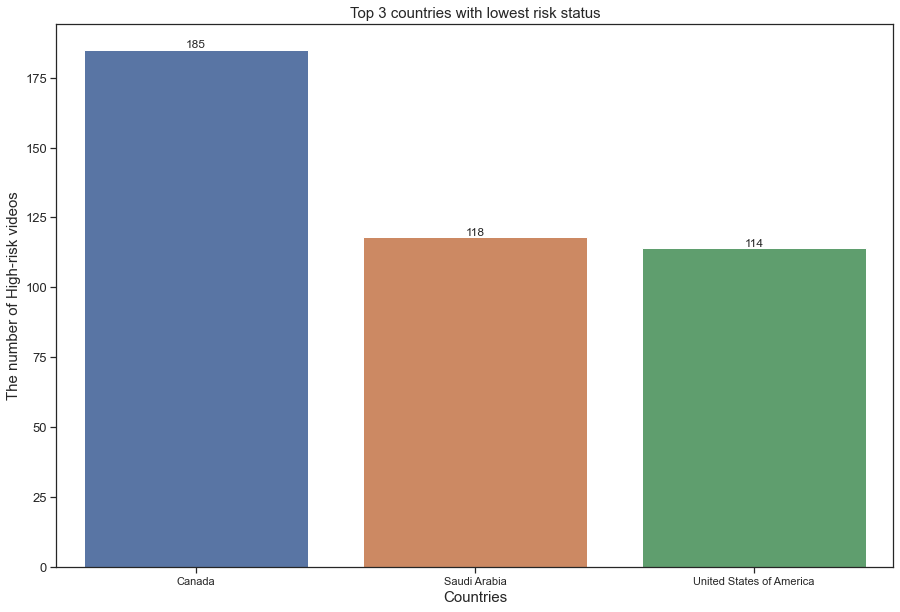

In [124]:
analyse2=main_df[(main_df['Risk Status']=="Low")]
analyse2=analyse2.groupby('Market')['Risk Status'].value_counts().reset_index(name='Counts').sort_values(ascending=False,by='Counts')
analyse2 =analyse2[['Market','Counts']].reset_index(drop=True).head(3)
analyse2=analyse2.groupby('Market')['Counts'].sum().sort_values(ascending=False)

plt.figure(figsize=(15,10))
chart=sns.barplot(x=analyse2.index, y=analyse2.values)
chart.bar_label(chart.containers[0])
plt.xticks(rotation= 0)
plt.yticks(fontsize=13)
plt.xlabel('Countries',fontsize=15)
plt.ylabel('The number of Low-risk videos',fontsize=15)
plt.title('Top 3 countries with lowest risk status',fontsize=15)



<a id='hyperlink3'></a>
**TOP 3 BRANDS WITH HIGHEST RISK STATUS**


Text(0.5, 1.0, 'Top 3 brands with lowest risk status')

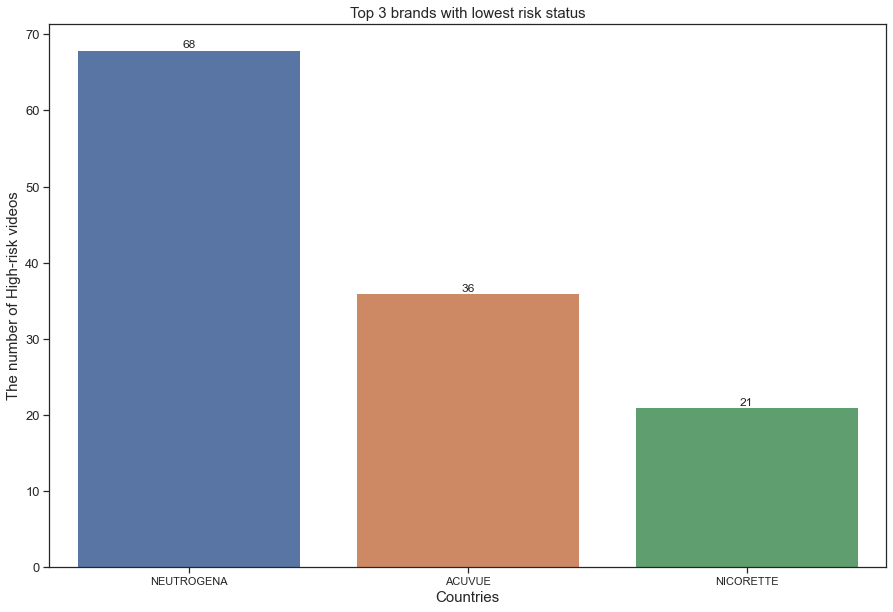

In [126]:
analyse3=main_df[(main_df['Risk Status']=="High")]
analyse3=analyse3.groupby('Brand')['Risk Status'].value_counts().reset_index(name='Counts').sort_values(ascending=False,by='Counts')
analyse3 =analyse3[['Brand','Counts']].reset_index(drop=True).head(3)
analyse3=analyse3.groupby('Brand')['Counts'].sum().sort_values(ascending=False)

plt.figure(figsize=(15,10))
chart=sns.barplot(x=analyse3.index, y=analyse3.values)
chart.bar_label(chart.containers[0])
plt.xticks(rotation= 0)
plt.yticks(fontsize=13)
plt.xlabel('Brands',fontsize=15)
plt.ylabel('The number of High-risk videos',fontsize=15)
plt.title('Top 3 brands with highest risk status',fontsize=15)

<a id='hyperlink4'></a>
**TOP 3 BRANDS WITH LOWEST RISK STATUS**


Text(0.5, 1.0, 'Top 3 brands with lowest risk status')

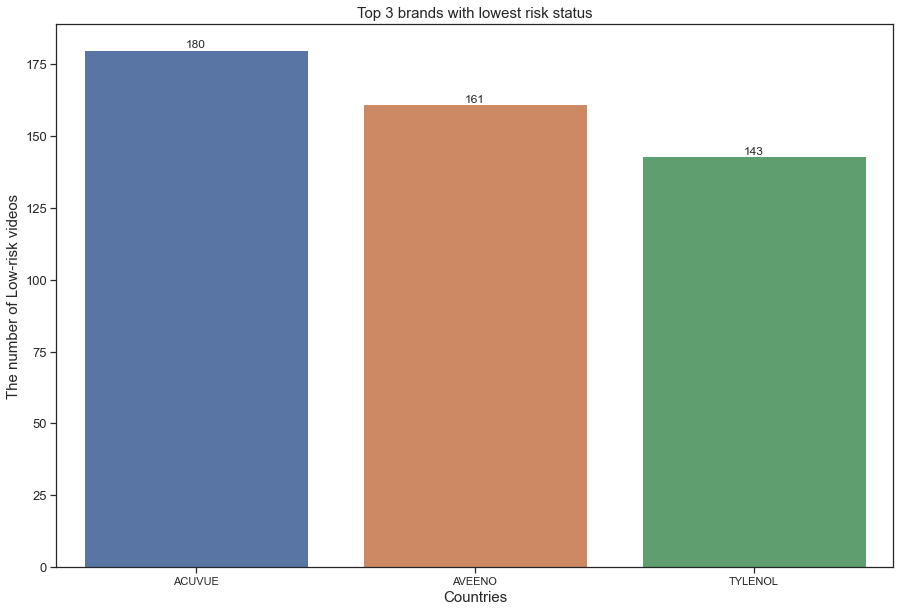

In [127]:
analyse4=main_df[(main_df['Risk Status']=="Low")]
analyse4=analyse4.groupby('Brand')['Risk Status'].value_counts().reset_index(name='Counts').sort_values(ascending=False,by='Counts')
analyse4 =analyse4[['Brand','Counts']].reset_index(drop=True).head(3)
analyse4=analyse4.groupby('Brand')['Counts'].sum().sort_values(ascending=False)

plt.figure(figsize=(15,10))
chart=sns.barplot(x=analyse4.index, y=analyse4.values)
chart.bar_label(chart.containers[0])
plt.xticks(rotation= 0)
plt.yticks(fontsize=13)
plt.xlabel('Brands',fontsize=15)
plt.ylabel('The number of Low-risk videos',fontsize=15)
plt.title('Top 3 brands with lowest risk status',fontsize=15)

<a id='hyperlink5'></a>
**TOP 3 COUNTRIES WITH HIGHEST NUMBER OF VIDEOS WITHOUT DESCRIPTION**


In [134]:
analyse5=main_df[(main_df['Description Risk Score']==1)]
analyse5=analyse5.groupby('Market')['Description Risk Score'].value_counts().reset_index(name='Counts').sort_values(ascending=False,by='Counts')
analyse5 =analyse5[['Market','Counts']].reset_index(drop=True).head(3)
analyse5=analyse5.groupby('Market')['Counts'].sum().sort_values(ascending=False)
analyse5

Market
Australia    73
Canada       72
Turkey       28
Name: Counts, dtype: int64

Text(0.5, 1.0, 'Top 3 countries with the highest number of videos without description')

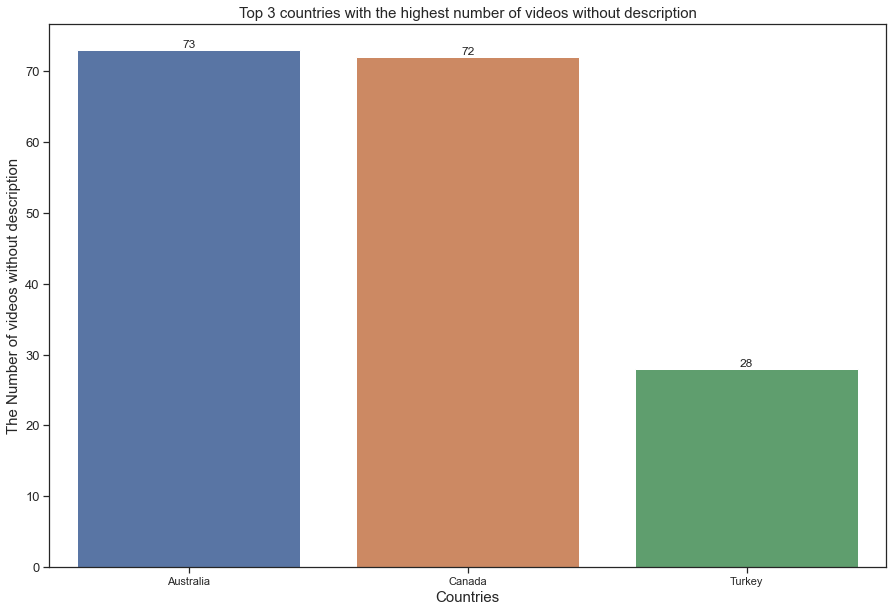

In [135]:
plt.figure(figsize=(15,10))
chart=sns.barplot(x=analyse5.index, y=analyse5.values)
chart.bar_label(chart.containers[0])
plt.xticks(rotation= 0)
plt.yticks(fontsize=13)
plt.xlabel('Countries',fontsize=15)
plt.ylabel('The Number of videos without description',fontsize=15)
plt.title('Top 3 countries with the highest number of videos without description',fontsize=15)

<a id='hyperlink6'></a>
**TOP 3 BRANDS WITH THE HIGHEST NUMBER OF VIDEOS WITHOUT DESCRIPTION**


In [137]:
analyse6=main_df[(main_df['Description Risk Score']==1)]
analyse6=analyse6.groupby('Brand')['Description Risk Score'].value_counts().reset_index(name='Counts').sort_values(ascending=False,by='Counts')
analyse6 =analyse6[['Brand','Counts']].reset_index(drop=True).head(4)
analyse6=analyse6.groupby('Brand')['Counts'].sum().sort_values(ascending=False)
analyse6


Brand
NEUTROGENA    86
ACUVUE        72
TYLENOL       72
LISTERINE     39
Name: Counts, dtype: int64

Text(0.5, 1.0, 'Top 3 brands with the highest number of videos without description')

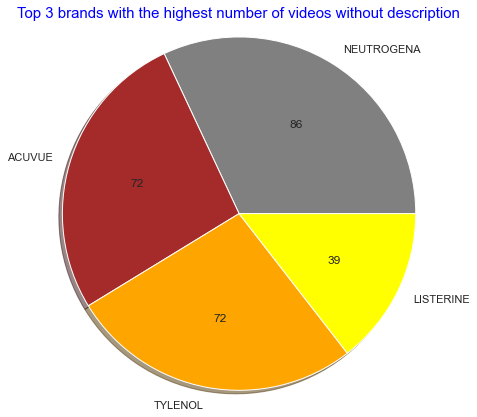

In [145]:
labels = analyse6.index
colors = ['grey','brown','orange','yellow']
explode = [0,0,0,0]
sizes = analyse6.values

# visual
plt.figure(figsize = (7,7))
p, tx, autotexts = plt.pie(sizes, labels=labels, colors=colors,
        autopct="", shadow=True)

for i, a in enumerate(autotexts):
    a.set_text("{}".format(sizes[i]))

plt.axis('equal')
plt.title('Top 3 brands with the highest number of videos without description',color = 'blue',fontsize = 15)

<a id='hyperlink7'></a>
**TOP 3 BRANDS WITH THE HIGHEST NUMBER OF VIDEOS COMMENTS ENABLED**


Text(0.5, 1.0, 'Top 3 brands with the highest number of videos comments enabled')

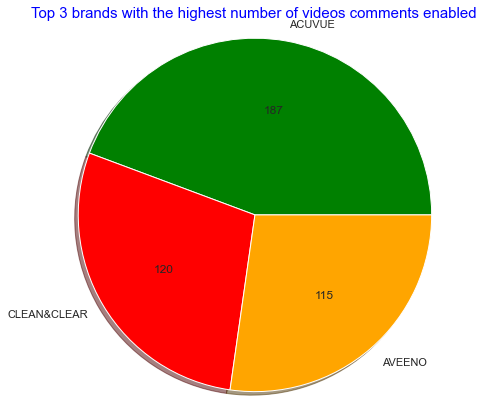

In [147]:
analyse7=main_df[(main_df['Comment Risk Score']==0)]
analyse7=analyse7.groupby('Brand')['Comment Risk Score'].value_counts().reset_index(name='Counts').sort_values(ascending=False,by='Counts')
analyse7 =analyse7[['Brand','Counts']].reset_index(drop=True).head(3)
analyse7=analyse7.groupby('Brand')['Counts'].sum().sort_values(ascending=False)
labels = analyse7.index
colors = ['green','red','orange']
explode = [0,0,0]
sizes = analyse7.values

# visual
plt.figure(figsize = (7,7))
p, tx, autotexts = plt.pie(sizes, labels=labels, colors=colors,
        autopct="", shadow=True)

for i, a in enumerate(autotexts):
    a.set_text("{}".format(sizes[i]))

plt.axis('equal')
plt.title('Top 3 brands with the highest number of videos comments enabled',color = 'blue',fontsize = 15)

<a id='hyperlink8'></a>
**TOP 3 COUNTRIES WITH THE HIGHEST NUMBER OF VIDEOS COMMENTS ENABLED**


Text(0.5, 1.0, 'Top 3 Countries with The Highest Number of Videos Comments Enabled')

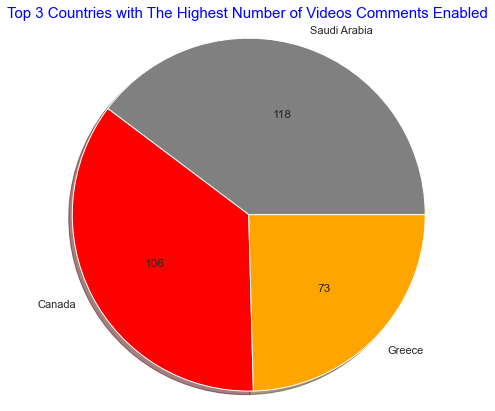

In [151]:
analyse8=main_df[(main_df['Comment Risk Score']==0)]
analyse8=analyse8.groupby('Market')['Comment Risk Score'].value_counts().reset_index(name='Counts').sort_values(ascending=False,by='Counts')
analyse8 =analyse8[['Market','Counts']].reset_index(drop=True).head(3)
analyse8=analyse8.groupby('Market')['Counts'].sum().sort_values(ascending=False)
labels = analyse8.index
colors = ['grey','red','orange']
explode = [0,0,0]
sizes = analyse8.values

# visual
plt.figure(figsize = (7,7))
p, tx, autotexts = plt.pie(sizes, labels=labels, colors=colors,
        autopct="", shadow=True)

for i, a in enumerate(autotexts):
    a.set_text("{}".format(sizes[i]))

plt.axis('equal')
plt.title('Top 3 Countries with The Highest Number of Videos Comments Enabled',color = 'blue',fontsize = 15)

<a id='hyperlink9'></a>
**TOP 3 BRANDS WITH THE VIDEOS HAVE LESS THAN 100 VIEWS**


In [153]:
analyse9=main_df[(main_df['View Risk Score']==1)]
analyse9=analyse9.groupby('Brand')['View Risk Score'].value_counts().reset_index(name='Counts').sort_values(ascending=False,by='Counts')
analyse9 =analyse9[['Brand','Counts']].reset_index(drop=True).head(3)
analyse9=analyse9.groupby('Brand')['Counts'].sum().sort_values(ascending=False)
analyse9

Brand
ACUVUE       187
LISTERINE     14
NICORETTE     13
Name: Counts, dtype: int64

Text(0.5, 1.0, 'The Top 3 Brands with The Videos Have Less Than 100 Views ')

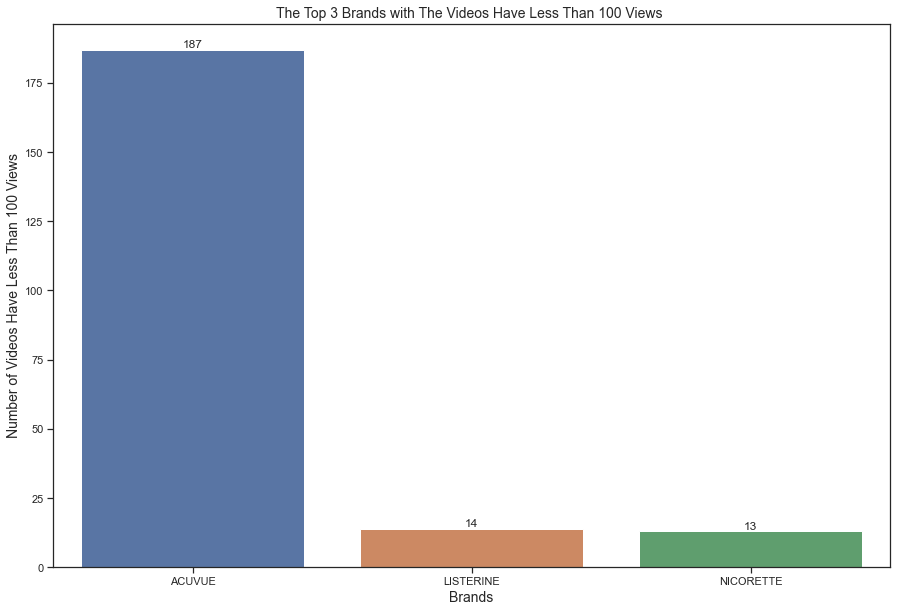

In [156]:
plt.figure(figsize=(15,10))
chart=sns.barplot(x=analyse9.index, y=analyse9.values)
chart.bar_label(chart.containers[0])
plt.xticks(rotation= 0)
plt.xlabel('Brands',fontsize=14)
plt.ylabel('Number of Videos Have Less Than 100 Views',fontsize=14)
plt.title('The Top 3 Brands with The Videos Have Less Than 100 Views ',fontsize=14)

<a id='hyperlink10'></a>
**TOP 3 COUNTRIES WITH THE VIDEOS HAVE LESS THAN 100 VIEWS**


Text(0.5, 1.0, 'The Top 3 Countries with The Videos Have Less Than 100 Views ')

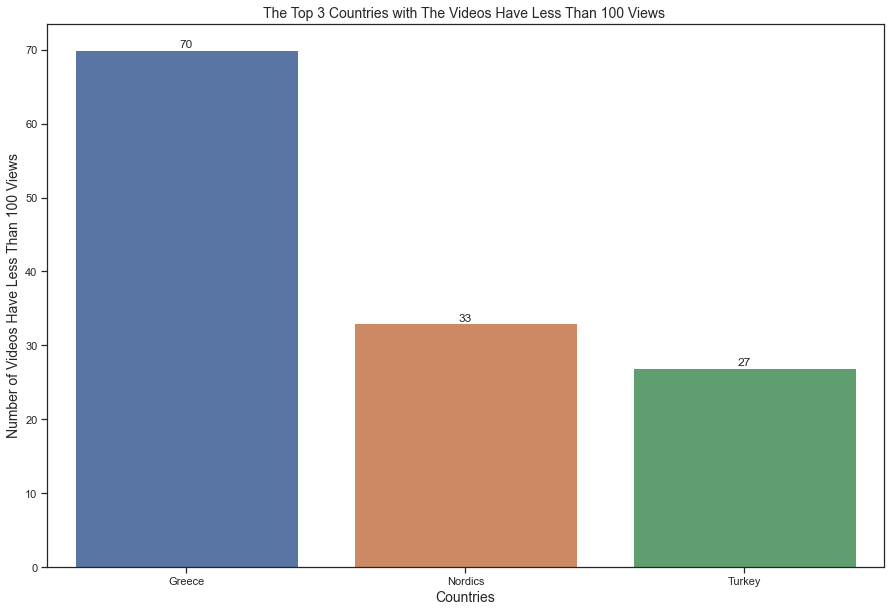

In [157]:
analyse10=main_df[(main_df['View Risk Score']==1)]
analyse10=analyse10.groupby('Market')['View Risk Score'].value_counts().reset_index(name='Counts').sort_values(ascending=False,by='Counts')
analyse10 =analyse10[['Market','Counts']].reset_index(drop=True).head(3)
analyse10=analyse10.groupby('Market')['Counts'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,10))
chart=sns.barplot(x=analyse10.index, y=analyse10.values)
chart.bar_label(chart.containers[0])
plt.xticks(rotation= 0)
plt.xlabel('Countries',fontsize=14)
plt.ylabel('Number of Videos Have Less Than 100 Views',fontsize=14)
plt.title('The Top 3 Countries with The Videos Have Less Than 100 Views ',fontsize=14)

<a id='hyperlink11'></a>
**TOP 3 CHANNELS HAVE VIDEOS WITHOUT LOCATIONS**


Text(0.5, 1.0, 'The Top 3 Channels Have Videos Without Locations')

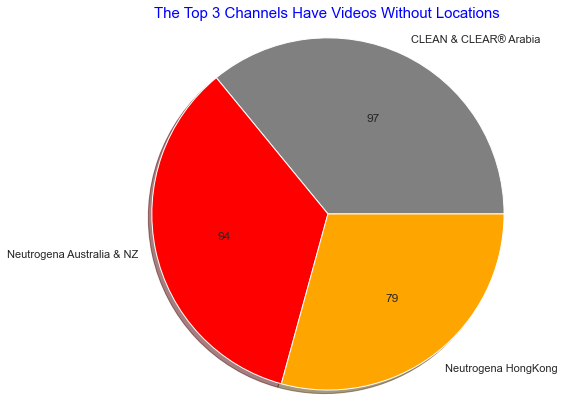

In [161]:
analyse11=main_df[(main_df['Location Risk Score']==1)]
analyse11=analyse11.groupby('Title')['Location Risk Score'].value_counts().reset_index(name='Counts').sort_values(ascending=False,by='Counts')
analyse11 =analyse11[['Title','Counts']].reset_index(drop=True).head(3)
analyse11=analyse11.groupby('Title')['Counts'].sum().sort_values(ascending=False)

labels = analyse11.index
colors = ['grey','red','orange']
explode = [0,0,0]
sizes = analyse11.values

# visual
plt.figure(figsize = (7,7))
p, tx, autotexts = plt.pie(sizes, labels=labels, colors=colors,
        autopct="", shadow=True)

for i, a in enumerate(autotexts):
    a.set_text("{}".format(sizes[i]))

plt.axis('equal')
plt.title('The Top 3 Channels Have Videos Without Locations',color = 'blue',fontsize = 15)